In [ ]:
!pip install p

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 609.8/609.8 kB 9.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.3/218.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.2/292.2 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.1/331.1 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 827.7 kB

# describtion

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
import pygwalker as pyg
import ydata_profiling
from autogluon.tabular import TabularPredictor as model
%matplotlib inline

The raw_data_*** file contains EMG recordings of hand gestures performed by 36 subjects wearing the MYO Thalmic bracelet. The data consists of two series of six or seven basic gestures, where each gesture was performed for 3 seconds with a 3-second pause between gestures. The data is recorded at a frequency of 200 Hz and contains 10 columns.

The first column is the time in milliseconds, and columns 2-9 represent the eight EMG channels of the MYO Thalmic bracelet. The last column, column 10, contains the label of the gesture, with the following classes:

0: unmarked data\
1: hand at rest\
2: hand clenched in a fist\
3: wrist flexion\
4: wrist extension\
5: radial deviations\
6: ulnar deviations\
7: extended palm 

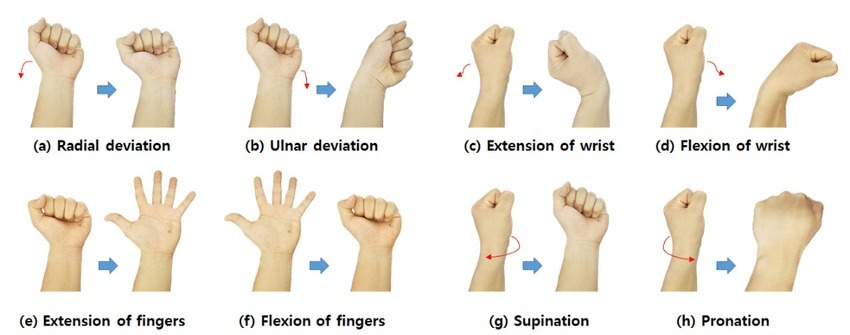

# import our data

In [4]:
df=pd.read_csv('/kaggle/input/emg-signal-for-gesture-recognition/EMG-data.csv')

In [5]:
profile = df.profile_report(title='Pandas Profiling Report')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# this step tells out model that out target is not just a numerical valus

In [6]:
y = df["class"]
y=y.astype('category')
print(y.info())

<class 'pandas.core.series.Series'>
RangeIndex: 4237907 entries, 0 to 4237906
Series name: class
Non-Null Count    Dtype   
--------------    -----   
4237907 non-null  category
dtypes: category(1)
memory usage: 4.0 MB
None


In [7]:
X=df.drop(columns=['time','label','class'])

# splitting the data

In [8]:
# split in training 70%, validation 10 %,  test 20% test 
from sklearn.model_selection import train_test_split
# 80 and 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True,random_state=42)

In [9]:
train_data = model.Dataset(X_train.join(y_train))
train_data

channel1  channel2  channel3  channel4  channel5  channel6  channel7  \
2120507  -0.00001  -0.00003  -0.00001  -0.00005  -0.00002  -0.00005  -0.00002   
4230876  -0.00001  -0.00003  -0.00004   0.00013   0.00059   0.00012   0.00002   
1875893  -0.00003  -0.00005  -0.00012   0.00012   0.00000   0.00001  -0.00001   
2428864   0.00000   0.00001   0.00002   0.00000   0.00001   0.00001   0.00002   
1682215   0.00001  -0.00007  -0.00008  -0.00082  -0.00004   0.00007   0.00004   
...           ...       ...       ...       ...       ...       ...       ...   
4044887  -0.00001  -0.00003  -0.00002  -0.00002   0.00000  -0.00001  -0.00002   
1136074  -0.00005  -0.00008  -0.00006  -0.00011  -0.00013  -0.00032   0.00008   
1570006   0.00003  -0.00001   0.00001  -0.00028  -0.00002  -0.00002   0.00012   
2234489  -0.00007  -0.00013  -0.00047  -0.00125  -0.00056  -0.00025  -0.00006   
1692743  -0.00002  -0.00002   0.00000  -0.00003  -0.00007  -0.00016   0.00000   

         channel8 class  
2120507   0.00000     0  
4230876  -0.00003     0  
1875893  -0.00001     0  
2428864  -0.00003     1  
1682215   0.00000     4  
...           ...   ...  
4044887   0.00000     0  
1136074  -0.00004     3  
1570006  -0.00044     6  
2234489  -0.00008     4  
1692743  -0.00003     0  

[3390325 rows x 9 columns]

# training step

In [10]:
predictor = model(label='class').fit(
    train_data,
    time_limit=600,
    presets='best_quality', num_gpus=1)

No path specified. Models will be saved in: "AutogluonModels/ag-20230529_200005/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230529_200005/"
AutoGluon Version:  0.7.0
Python Version:     3.10.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat May 20 10:48:19 UTC 2023
Train Data Rows:    3390325
Train Data Columns: 8
Label Column: class
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == category).
	8 unique label values:  [0, 1, 4, 6, 2, 5, 3, 7]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 8
Using Feature Generators to prep

In [11]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                   model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  KNeighborsDist_BAG_L1   0.977794     171.738556   10.139865              171.738556          10.139865            1       True          2
1    WeightedEnsemble_L2   0.977794     172.133433  324.020244                0.394877         313.880380            2       True          3
2  KNeighborsUnif_BAG_L1   0.968451     168.649946   11.504723              168.649946          11.504723            1       True          1
Number of models trained: 3
Types of models trained:
{'WeightedEnsembleModel', 'StackerEnsembleModel_KNN'}
Bagging used: True  (with 8 folds)
Multi-layer stack-ensembling used: False 
Feature Metadata (Processed):
(raw dtype, special dtypes):
('float', []) : 8 | ['channel1', 'channel2', 'channel3', 'channel4', 'channel5', ...]
Plot summary of models saved to file: Autoglu

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.9684508122377649,
  'KNeighborsDist_BAG_L1': 0.977793869319313,
  'WeightedEnsemble_L2': 0.977793869319313},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif_BAG_L1': 'AutogluonModels/ag-20230529_200005/models/KNeighborsUnif_BAG_L1/',
  'KNeighborsDist_BAG_L1': 'AutogluonModels/ag-20230529_200005/models/KNeighborsDist_BAG_L1/',
  'WeightedEnsemble_L2': 'AutogluonModels/ag-20230529_200005/models/WeightedEnsemble_L2/'},
 'model_fit_times': {'KNeighborsUnif_BAG_L1': 11.504723072052002,
  'KNeighborsDist_BAG_L1': 10.139864683151245,
  'WeightedEnsemble_L2': 313.88037967681885},
 'model_pred_times': {'KNeighborsUnif_BAG_L1': 168.64994645118713,
  'KNeighborsDist_BAG_L1': 171.73855590820312,
  'WeightedEnsemble_L2': 0.39487671852111816},
 'num_bag_

# Try our model on data that never seen before

In [12]:
# create a testing dataset
test_data = model.Dataset(X_test.join(y_test))
predictor.leaderboard(test_data, silent=True)

model  score_test  score_val  pred_time_test  \
0  KNeighborsDist_BAG_L1    0.978198   0.977794       50.415157   
1    WeightedEnsemble_L2    0.978198   0.977794       50.461256   
2  KNeighborsUnif_BAG_L1    0.966166   0.968451       50.296797   

   pred_time_val    fit_time  pred_time_test_marginal  pred_time_val_marginal  \
0     171.738556   10.139865                50.415157              171.738556   
1     172.133433  324.020244                 0.046099                0.394877   
2     168.649946   11.504723                50.296797              168.649946   

   fit_time_marginal  stack_level  can_infer  fit_order  
0          10.139865            1       True          2  
1         313.880380            2       True          3  
2          11.504723            1       True          1

In [13]:
# evaluate the model on the testing dataset
eval_result = predictor.evaluate(test_data)

Evaluation: accuracy on test data: 0.9781979796645044
Evaluations on test data:
{
    "accuracy": 0.9781979796645044,
    "balanced_accuracy": 0.9650562343013367,
    "mcc": 0.9613853104472606
}


In [14]:
eval_result

{'accuracy': 0.9781979796645044,
 'balanced_accuracy': 0.9650562343013367,
 'mcc': 0.9613853104472606}

In [15]:
# create a testing dataset
test_data = model.Dataset(X_test)
# make predictions on the testing dataset
y_pred = predictor.predict(test_data)

In [16]:
prediction=pd.DataFrame({"actual values":y_test,"predicted values":y_pred})

In [17]:
prediction

actual values predicted values
1799387             0                0
4127493             0                0
3463410             6                6
94166               1                1
3922877             0                0
...               ...              ...
3341092             4                4
3454715             0                0
2932305             1                1
314205              0                0
3728358             0                0

[847582 rows x 2 columns]

# use the model for prediction


# Make readable output

In [18]:
def output(manual_pred):
    if (manual_pred == 0).any():
        return "unmarked data"
    elif (manual_pred == 1).any():
        return "hand at rest"
    elif (manual_pred == 2).any():
        return "hand clenched in a fist"
    elif (manual_pred == 3).any():
        return "wrist flexion"
    elif (manual_pred == 4).any():
        return "wrist extension"
    elif (manual_pred == 5).any():
        return "radial deviations"
    elif (manual_pred == 6).any():
        return "ulnar deviations"
    else:
        return "Invalid manual_pred value"

In [19]:
point=model.Dataset(X_test.iloc[3434, :]).T
manual_pred=predictor.predict(point)
print(f"the actual class is: {y_test[manual_pred.index]}")
print(f"the predicted class is: {manual_pred}")
output(manual_pred)

the actual class is: 63208    0
Name: class, dtype: category
Categories (8, int64): [0, 1, 2, 3, 4, 5, 6, 7]
the predicted class is: 63208    0
Name: class, dtype: object


'unmarked data'

In [20]:
point=model.Dataset(X_test.iloc[87676, :]).T
manual_pred=predictor.predict(point)
print(f"the actual class is: {y_test[manual_pred.index]}")
print(f"the predicted class is: {manual_pred}")
output(manual_pred)

the actual class is: 2840502    6
Name: class, dtype: category
Categories (8, int64): [0, 1, 2, 3, 4, 5, 6, 7]
the predicted class is: 2840502    6
Name: class, dtype: object


'ulnar deviations'

In [21]:
point=model.Dataset(X_test.iloc[547676, :]).T
manual_pred=predictor.predict(point)
print(f"the actual class is: {y_test[manual_pred.index]}")
print(f"the predicted class is: {manual_pred}")
output(manual_pred)

the actual class is: 3510486    1
Name: class, dtype: category
Categories (8, int64): [0, 1, 2, 3, 4, 5, 6, 7]
the predicted class is: 3510486    1
Name: class, dtype: object


'hand at rest'

In [22]:
point=model.Dataset(X_test.iloc[83764, :]).T
manual_pred=predictor.predict(point)
print(f"the actual class is: {y_test[manual_pred.index]}")
print(f"the predicted class is: {manual_pred}")
output(manual_pred)

the actual class is: 3723510    5
Name: class, dtype: category
Categories (8, int64): [0, 1, 2, 3, 4, 5, 6, 7]
the predicted class is: 3723510    5
Name: class, dtype: object


'radial deviations'

In [23]:
point=model.Dataset(X_test.iloc[567, :]).T
manual_pred=predictor.predict(point)
print(f"the actual class is: {y_test[manual_pred.index]}")
print(f"the predicted class is: {manual_pred}")
output(manual_pred)

the actual class is: 3451222    4
Name: class, dtype: category
Categories (8, int64): [0, 1, 2, 3, 4, 5, 6, 7]
the predicted class is: 3451222    4
Name: class, dtype: object


'wrist extension'